In [16]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

## 每篇文章的url

In [28]:
url = []
like = []
for i in range(1,12):
    re=requests.get('https://www.ptt.cc/bbs/Stock/search?page='+str(i)+'&q=%E6%96%B0%E8%81%9E')
    soup=BeautifulSoup(re.text.encode('utf-8'), "lxml")
    result = soup.select("div.title") 
    for item in result:
        a_item = item.select_one("a")
        if a_item:
            url.append('https://www.ptt.cc'+ a_item['href'])
    result1 = soup.select("div.nrec")
    for t in result1 :
        like.append(t.text)

In [30]:
print(len(url))
print(len(like))

220
220


## 日期、作者、標題、內文

In [31]:
def checkformat(soup, class_tag, date, index):
    date = soup.select(class_tag)[index].text
    return date

contents=[]
dates = []
authors=[]
titles=[]

for i in url:
    response = requests.get(i)
    soup = BeautifulSoup(response.text, 'lxml')
    try:
        #標題
        title = checkformat(soup, '.article-meta-value', 'date', 2)
        #作者
        author = checkformat(soup, '.article-meta-value', 'date', 0)
        #日期
        date = checkformat(soup, '.article-meta-value', 'date', 3)
        #文章內文
        content = soup.find(id="main-content").text
        #保留文章內容部分(將留言、日期...等等刪除)
        target_content = '※ 發信站: 批踢踢實業坊(ptt.cc),'
        content = content.split(date)[1]
        content = content.split(target_content)[0]
        #去除掉文末 --
        main_content = content.replace('--', '')
        #新增至list
        contents.append(main_content)
        dates.append(date)
        titles.append(title)
        authors.append(author)
    except IndexError:
        content = soup.find(id="main-content").text
        contents.append(content)
        dates.append(None)
        titles.append(None)
        authors.append(None)
        print(i)

In [32]:
print(len(url))
print(len(titles))
print(len(authors))
print(len(dates))
print(len(contents))

220
220
220
220
220


# 分類是否推爆

In [202]:
bomb = []
for i in like:
    if i == '爆':
        bomb.append(1)
#     elif 'X' in i:
#         bomb.append(0)
        
#     elif i != '':
#         if int(i) >= 60:
#             bomb.append(1)
#         else:
#             bomb.append(0)
    else:
        bomb.append(0)

In [203]:
bomb

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0]

## 轉成Data Frame

In [8]:
site=[None]*len(url)

In [9]:
dic = { 'site': site,
       'title': titles,
       'author': authors,
       'date' : dates,
       'content':contents ,
       'like':like
}

In [10]:
PPT_Stock = pd.DataFrame(dic)

In [12]:
PPT_Stock['site']="PTT-STOCK 版"

In [14]:
PPT_Stock.head()

,site,title,author,date,content
0,PTT-STOCK 版,[新聞] 營收：訊芯-KY(6451)4月營收3億9035萬元,scum5566 (你好宅),Fri May 8 17:31:43 2020,\n\n1.原文連結：\n\n\nhttps://tw.stock.yahoo.com/ne...
1,PTT-STOCK 版,[新聞] 聯上發（2537）四月營收報告,cpblgu (《善良溫柔》的心愛),Fri May 8 17:06:15 2020,\n【財訊快報／編輯部】聯上發(2537)自結109年4月營收5億9996萬5000元，和上...
2,PTT-STOCK 版,[新聞] 財報：遠見(3040)109年第一季淨利歸屬母,j5163124 (Little Y),Fri May 8 16:49:06 2020,\n-發文提醒\n1.發文前請先詳閱[新聞]分類發文規範，未依規範發文將受處份。\n2.連結...
3,PTT-STOCK 版,[新聞] 寶齡富錦3月稅後虧損700萬元 每股虧0.09,tonyparker18 (tonyparker183),Fri May 8 16:30:37 2020,\n\n1.原文連結：\n\nhttps://is.gd/5LYmBd\n\n2.原文內容：...
4,PTT-STOCK 版,[新聞] 半導體 Switch滑鼠撐腰原相Q2營收拚季增5,kria5304 (XenoMegaREENovaSaga),Fri May 8 16:12:33 2020,\n\n1.原文連結：\nhttps://tinyurl.com/y7633pvl\n\n2...


In [15]:
PPT_Stock.to_csv("/Users/Rebeca/Desktop/Fintech/PPT_Stock.csv",sep=',',encoding="utf-8",index=False)

# TF-IDF

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
#将文本中的词语转换为词频矩阵
vectorizer = CountVectorizer()
#计算个词语出现的次数
X = vectorizer.fit_transform(contents)
#获取词袋中所有文本关键词
word = vectorizer.get_feature_names()
print(len(word))
print(word)

14832
['00', '000', '00000000', '0000元', '000人', '000仟元', '000仟元整', '000個航班', '000億元的鞋王寶成', '000元', '000元人民幣', '000萬美元', '000萬部', '005', '00668美元', '00672l', '00億', '00到了', '00時的價格', '00點', '01', '014億美元', '019年', '01b', '01億元', '01元', '02', '029', '02e', '02億元', '02元', '02美元的價位來購買169萬股', '03', '038仟元', '03億', '03億元', '04', '04億', '04元', '05', '054', '05億元', '05億元的好成績', '05美元', '05還差', '06', '063', '06億', '06億元', '07', '071', '072324503', '07億', '07億元', '07元', '08', '084355649', '08b', '08億元', '08元', '09', '09億元翻新發電設備', '09元', '09兆韓元', '0o4lgy', '0o4r6y', '0odgdk', '0rz', '0以下的緊縮速度', '0元相較', '0版', '0至25', '0至37', '10', '100', '10000000', '1000萬元以下的客戶', '100億新台幣', '100萬部iphone加', '10222', '103', '104', '1056', '105元', '107', '108', '108年', '108第1季', '109', '1090', '1090504', '1090506', '1090507', '1090509', '1096806291', '109q1每股淨值', '109年', '109年1月1日至3月31日', '109年1月至4月合併累計自結各項提存前稅前淨利3', '109年度第一季合併財務報表情形簡述如下', '109年第1季0', '109年第一季淨損歸屬母公司業主22億5553萬元', '10倍', '10元', '10到20吋為26', '10吋以下為2

In [45]:
#查看词频结果
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [49]:
from sklearn.feature_extraction.text import TfidfTransformer

In [50]:
 #类调用
transformer = TfidfTransformer()
print(transformer)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)


In [51]:
#将词频矩阵X统计成TF-IDF值
tfidf = transformer.fit_transform(X)
#查看数据结构 tfidf[i][j]表示i类文本中的tf-idf权重
print(tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [54]:
Z = tfidf.toarray()

In [79]:
len(Z[0])

14832

# PCA

In [55]:
from sklearn.decomposition import PCA

In [156]:

# 我們只要最大的兩個主成分。scikit-learn 會自動幫我們
# 依照 eigenvalue 的大小排序共變異數矩陣的 eigenvectors
n_components = 2
random_state = 9527

pca = PCA(n_components=n_components, 
          random_state=random_state)

# 注意我們是對正規化後的特徵 Z 做 PCA
L = pca.fit_transform(Z)  # (n_samples, n_components)



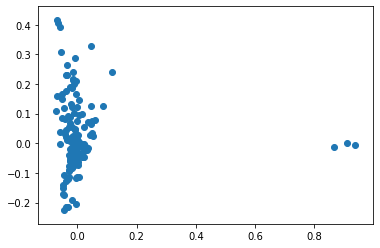

In [157]:
import matplotlib.pyplot as plt
# 將投影到第一主成分的 repr. 顯示在 x 軸，第二主成分在 y 軸
plt.scatter(L[:, 0], L[:, 1])
plt.axis('equal');

# SVM

In [77]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
col = []
for i in range(len(Z[0])):
    col.append(str(i))

In [86]:
x = pd.DataFrame(Z, columns=col)
x

,0,1,2,3,4,5,6,7,8,9,...,14822,14823,14824,14825,14826,14827,14828,14829,14830,14831
0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [204]:
y = pd.DataFrame(bomb, columns=['target'])
y

,target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [205]:
ptt_data = pd.concat([x,y], axis=1)
ptt_data

,0,1,2,3,4,5,6,7,8,9,...,14823,14824,14825,14826,14827,14828,14829,14830,14831,target
0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
7,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
8,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0


In [206]:
from sklearn.model_selection import train_test_split

In [207]:
ptt_data.iloc[:, 0: 14832] #iloc[,] (逗號前面為選行，逗號後面為選列)

,0,1,2,3,4,5,6,7,8,9,...,14822,14823,14824,14825,14826,14827,14828,14829,14830,14831
0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [208]:
X_train, X_test, y_train, y_test = train_test_split(
    ptt_data.iloc[:, 0: 14832], ptt_data[['target']], test_size=0.3, random_state=0)

In [192]:
y_train

,target
40,0
13,0
118,0
83,0
24,0
30,0
60,0
56,0
116,0
97,0


In [193]:
print(len(X_train)) #變數
print(len(X_test))

154
66


In [194]:
print(len(y_train)) 
print(len(y_test))

154
66


In [209]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [196]:
from sklearn.svm import SVC

In [197]:
svm = SVC(kernel='linear', probability=True)

In [210]:
svm.fit(X_train_std,y_train['target'].values)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [211]:
svm.predict(X_test_std)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [212]:
y_test['target'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [213]:
error = 0
for i, v in enumerate(svm.predict(X_test_std)):
    if v!= y_test['target'].values[i]:
        error+=1
print(error)

0


In [185]:
svm.predict_proba(X_test_std)

array([[0.61972657, 0.38027343],
       [0.60277514, 0.39722486],
       [0.95739322, 0.04260678],
       [0.53115448, 0.46884552],
       [0.26470218, 0.73529782],
       [0.60713743, 0.39286257],
       [0.48806133, 0.51193867],
       [0.53593134, 0.46406866],
       [0.60432758, 0.39567242],
       [0.58827018, 0.41172982],
       [0.55621913, 0.44378087],
       [0.6580388 , 0.3419612 ],
       [0.1431204 , 0.8568796 ],
       [0.63697455, 0.36302545],
       [0.54753429, 0.45246571],
       [0.51930119, 0.48069881],
       [0.57279455, 0.42720545],
       [0.62047238, 0.37952762],
       [0.63130466, 0.36869534],
       [0.53841368, 0.46158632],
       [0.54427899, 0.45572101],
       [0.35533912, 0.64466088],
       [0.72147634, 0.27852366],
       [0.47464154, 0.52535846],
       [0.49489027, 0.50510973],
       [0.54304751, 0.45695249],
       [0.52149592, 0.47850408],
       [0.10097837, 0.89902163],
       [0.70929305, 0.29070695],
       [0.60856968, 0.39143032],
       [0.